In [79]:
import pandas as pd
import numpy as np
from IPython.display import display, Math, Latex
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

<h1>HomeWork #2</h1>
<h2>Sami Wood</h2>

<h3>Problem 1</h3>



<h4>Part A:</h4>
Build a Naïve Bayes classifierusing the data shown in Table 1to predict whether a text filewill be saved (class label y = +1) or discarded(y = -1). The features (x(i), i = 1, 2, ..., 5) are binary values (representing some attributes of a text file, e.g., “known author or not”, “long or short”, etc.).


The classifier computes the probability in the following steps:

<li>Step 1: Compute the prior probability for each class(p(y)), y+-1 or +1;</li>
<li>Step 2: Computethe likelihood probability with each classfor each feature (p(x(i)| y))</li>
<li>Step 3: Calculate the posterior probability for each class given each feature (p(y | x(i));</li>
<li>Step 4: Predictaclass for a given text filebased on the posterior probability. Specifically, what is the posterior probability that y = +1 given the feature vectorx = (1 1 0 1 0). Which class would be predicted for x = (0 0 0 0 0)? What about for x = (1 1 0 1 0)</li>

In [2]:
df = pd.DataFrame({'x1':[0,1,0,1,0,1,0,1,1,1],
                   'x2':[0,1,1,1,1,0,0,0,0,1],
                   'x3':[1,0,1,1,0,1,1,0,1,1],
                   'x4':[1,1,1,1,0,1,0,0,1,1],
                   'x5':[0,0,1,0,0,1,0,0,0,1],
                   'y' :[-1,-1,-1,-1,-1,1,1,1,1,-1]})



<b>Step 1</b>
calculate prior for each class:

In this case we have only two classes and we can simply look at the relative frequencies of each class.
We would do this with the following equation:

$$\frac{NumInClass}{Total}$$

The calculation is shown below

In [35]:
p1 = len(df.loc[df['y'] == 1])/len(df)
pm1 = len(df.loc[df['y'] == -1])/len(df)
print('prior for class 1: ' + str(p1))
print('prior for class -1: ' + str(pm1))
priorDf = pd.DataFrame({'y':[1,-1],'prob':[p1,pm1]})

prior for class 1: 0.4
prior for class -1: 0.6


<b>Step 2:</b>
In order to find the probability of a class given some input we can apply bayes rule:

$$P(y_i|x_1,x_2...,x_n) = P(x_1,x_2,...,x_n) * P(y_i)$$

This calculation can be greatly simplified if we make the assumption that all the input variables x are independent.

$$P(y_i|x_1,x_2,...,x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$

Now we can work with this equation as we can calculate the individual probability distribution terms as follows:

$$P(x_j|y_i) = count(x_i)/count(y)$$

when done for each variable $x_j$ with $y_i$ we will have a binary probability distribution for each variable $x_j$

In [28]:
pdf = pd.DataFrame([])
for y in set(df.y):
    mini = df.loc[df.y == y]
    pdfmini = pd.DataFrame([])
    u = len(mini)
    for x in df.columns:
        if x != 'y':
            pdfmini[x]  = mini.groupby(x).size()/u
    pdfmini['y'] = y
    pdf = pdf.append(pdfmini)

pdf.fillna(0,inplace=True)
print(pdf)

      x1        x2        x3        x4        x5  y
x1                                                 
0   0.25  1.000000  0.250000  0.500000  0.750000  1
1   0.75  0.000000  0.750000  0.500000  0.250000  1
0   0.50  0.166667  0.333333  0.166667  0.666667 -1
1   0.50  0.833333  0.666667  0.833333  0.333333 -1


<b>Step 3:</b>
Now that we have a probability distribution of our inputs given the observation of our outputs we can apply bayes rule to find a probability distrobution of outputs given inputs.
Again this is simply calculated assuming the inputs are independent as follows:

$$P(y_i|x_1,x_2,...,x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$

For the given data we can calculate a probability distribution for each row.
We can use this as a sanity check.
One would hope to see for the most part the class with the
highest probability would correspond to the actual class of the row. Another check is that probabilites should sum to 1

In [71]:
summer = []
def getProbOfOutput(row):
    def inner(priorRow):
        pdfgy = pdf.loc[pdf.y == priorRow.y]
        prob = 1
        colIdx = 0
        for input in row:
            prob = prob * pdfgy.iloc[input,colIdx]
            colIdx = colIdx + 1
        summer.append(prob)
        return prob

    priorDf['py'] = 0
    priorDf['py'] = priorDf.apply(lambda rx: inner(rx) ,axis=1)
    print('Given')
    print(row.to_frame().T.to_string(index=False))
    print("the probability distribution is: ")
    print(priorDf[['y','py']].to_string(index=False))
    print('\n')

ignore = df.drop(columns='y').apply(lambda x: getProbOfOutput(x),axis = 1)
print('sum of all probabilites is: ' + str(sum(summer)))

Given
 x1  x2  x3  x4  x5
  0   0   1   1   0
the probability distribution is: 
 y       py
 1 0.070312
-1 0.030864


Given
 x1  x2  x3  x4  x5
  1   1   0   1   0
the probability distribution is: 
 y      py
 1 0.00000
-1 0.07716


Given
 x1  x2  x3  x4  x5
  0   1   1   1   1
the probability distribution is: 
 y      py
 1 0.00000
-1 0.07716


Given
 x1  x2  x3  x4  x5
  1   1   1   1   0
the probability distribution is: 
 y       py
 1 0.000000
-1 0.154321


Given
 x1  x2  x3  x4  x5
  0   1   0   0   0
the probability distribution is: 
 y       py
 1 0.000000
-1 0.015432


Given
 x1  x2  x3  x4  x5
  1   0   1   1   1
the probability distribution is: 
 y       py
 1 0.070312
-1 0.015432


Given
 x1  x2  x3  x4  x5
  0   0   1   0   0
the probability distribution is: 
 y       py
 1 0.070312
-1 0.006173


Given
 x1  x2  x3  x4  x5
  1   0   0   0   0
the probability distribution is: 
 y       py
 1 0.070312
-1 0.003086


Given
 x1  x2  x3  x4  x5
  1   0   1   1   0
the probability 

<b>Step 4:</b> Prediction
Finally we may also use our classifier to predict new data.
This process is exactly the same as step 3 only now we may be predicting never before seen data.

In [59]:
inDf = pd.DataFrame({
                   'x1':[1,0],
                   'x2':[1,0],
                   'x3':[0,0],
                   'x4':[1,0],
                   'x5':[0,0]})
ignore = inDf.apply(lambda x: getProbOfOutput(x),axis=1)

Given
 x1  x2  x3  x4  x5
  1   1   0   1   0
the probability distribution is: 
 y      py
 1 0.00000
-1 0.07716


Given
 x1  x2  x3  x4  x5
  0   0   0   0   0
the probability distribution is: 
 y       py
 1 0.023438
-1 0.003086




<h4>Part B:</h4>

<b>Section 1: Algorithm overview </b>

Gaussian Naive Bayes is simply an extension of naive Bayes.
Naive Bayes uses the relative frequency of inputs to calculate a simple discrete probability distribution.
This idea is extended by instead calculating the mean and standard deviation of inputs with each classification.
In doing this we can estimate a continuous probability distribution for each class.
Recall the formula of a normal distribution is as follows:

$$P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{ \frac{-1}{2}\left( \frac{x-\mu}{\sigma} \right)^2}$$

We can use our training data set to estimate the parameters of the distribution as follows:

$$\mu = \frac{\sum x}{n}$$

where x is the input variable for some class and n is the frequncy of x in the training data.

$$\sigma = \sqrt{\frac{\sum(x-\mu)^2}{n}}$$

Given these parameters we arrive at an equation that will describe the probability of an event. From this point we follow the same process as we would with a naive bayes classifer.

Again in order to find the probability of a class given some input we can apply bayes rule:

$$P(y_i|x_1,x_2...,x_n) = P(x_1,x_2,...,x_n) * P(y_i)$$

This calculation can be greatly simplified if we make the assumption that all the input variables x are independent.

$$P(y_i|x_1,x_2,...,x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$

Now we can work with this equation as we can calculate the individual probability distribution terms by plugging in values given some class $y_i$ as follows:

let n_i be the number of samples whose class is $y_i$
let x_i be any training data with class label y_i such that

$$\mu_i = \frac{\sum x}{n_i}$$

$$\sigma_i = \sqrt{\frac{\sum(x_i-\mu_i)^2}{n_i}}$$


$$P(x_i|y_i) = \frac{1}{\sigma_i\sqrt{2\pi}}e^{ \frac{-1}{2}\left( \frac{x-\mu_i}{\sigma_i} \right)^2}$$

Lastly $P(y_i)$ can simply be calculated as the relative frequcy of the class:

$$P(y_i) = \frac{count(y_i)}{count(y)}$$

With all the pieces of the puzzle together we would be able to apply the following formula to find the class probabilities

$$P(y_i|x_1,x_2...,x_n) = P(x_1,x_2,...,x_n) * P(y_i)$$

<b>Section 2: Implantation overview </b>

In the following section a Niave Gaussian Bayes code implementation will be used to classify breast cancer samples into malignant or begnin.
There are 30 features which are used to inform the classification.
More information on the dataset may be found at the following:
<href>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html</href>

<b>Section 2 a: Implantation: </b> Gaussian Naive Bayes Classifier

In [86]:
data = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=.2)
ngclf = GaussianNB()
ngclf.fit(X_train,y_train)
print('mean accuracy of the classifier is: ' + str(ngclf.score(X_test,y_test)))
print('The confusion matrix is: ')
print(str(confusion_matrix(y_test, ngclf.predict(X_test))))



mean accuracy of the classifier is: 0.9473684210526315
The confusion matrix is: 
[[30  4]
 [ 2 78]]


<b>Section 2 b: Implantation: The effects of noise</b>

In [84]:
noiseVarince = [5,5e2,5e3,5e4,5e5,5e6]
noiseSigma = np.sqrt(noiseVarince)
acc = []
print('Introducing normally distributed noise to all features: ')
for s in noiseSigma:
    noisy_X_train = X_train.apply(lambda x: x + np.random.normal(0,s,len(X_train)))
    ngclf.fit(noisy_X_train,y_train)
    acc.append(ngclf.score(X_test,y_test))
    print('mean accuracy of the classifier @ sigma = '+str(s) + ' is: ' + str(ngclf.score(X_test,y_test)))
    print('The confusion matrix @ sigma = '+str(s) + ' is: ')
    print(str(confusion_matrix(y_test, ngclf.predict(X_test))))
    print('\n')

Introducing normally distributed noise to all features: 
mean accuracy of the classifier @ sigma = 2.23606797749979 is: 0.9385964912280702
The confusion matrix @ sigma = 2.23606797749979 is: 
[[37  4]
 [ 3 70]]


mean accuracy of the classifier @ sigma = 22.360679774997898 is: 0.9298245614035088
The confusion matrix @ sigma = 22.360679774997898 is: 
[[35  6]
 [ 2 71]]


mean accuracy of the classifier @ sigma = 70.71067811865476 is: 0.9035087719298246
The confusion matrix @ sigma = 70.71067811865476 is: 
[[32  9]
 [ 2 71]]


mean accuracy of the classifier @ sigma = 223.60679774997897 is: 0.8947368421052632
The confusion matrix @ sigma = 223.60679774997897 is: 
[[31 10]
 [ 2 71]]


mean accuracy of the classifier @ sigma = 707.1067811865476 is: 0.8157894736842105
The confusion matrix @ sigma = 707.1067811865476 is: 
[[20 21]
 [ 0 73]]


mean accuracy of the classifier @ sigma = 2236.06797749979 is: 0.6578947368421053
The confusion matrix @ sigma = 2236.06797749979 is: 
[[ 2 39]
 [ 0 73

<b>Section 3 a: Experimental results </b>

For this data set the Gaussian naive bayes classifier works quite well.
On an 80 20 test train split the accuracy of the classifier is between 90 and 95 percent.
This would suggest at least for relatively simple binary classification problems the gaussian Naive Bayes classifier is effective.
There are some underlying assumptions that may cause this classifier to fail.
The biggest one is that all features are independent.
For the case of the Wisconsin cancer data set this is probably a fair assumption as humans selected features they thought were relevant.
In many applications this would not be the case, and in general this is seen as one of the greatest short comings of this method.
Also in our case the feature dimension is very large compared to the class dimension.
This means that even if our independence assumption is only true for a small subset of the features we can probably still get good performance.


In section 2b we se the classifier is somewhat sensitive to noise.
One nice thing about the bayes approach, it is not necessary to scale all the features into the same range.
This means that if we add a noise signal across all the features some may be affected more than others.
As the size of the noise grows more of the features will start to represent the noisy gausian distributions rather than their own true underlying one.
This makes this method somewhat sensitive to noise.
As we can see for see from the graph of accuracy vs standard deviation of a noise distribution below,
the accuracy is not hurt much for small amounts of noise but as sigma grows the performance is hurt greatly.


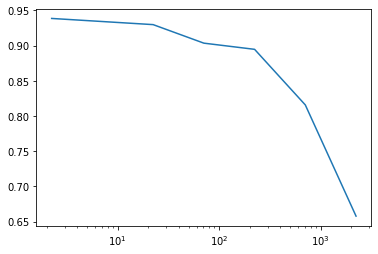

In [88]:
plt.semilogx(noiseSigma,acc)
plt.show()

There is a fairly steep drop off in accuracy around sigma = 500.
Past that point the classifier begins to approach a random guess.
For a binary classification simply guessing the class would result in an accuracy of around 50%.
For the largest sigma value of noise the accuracy of classifier was around 65%.

<b>Section 3 b: Discussion </b>

The naive Bayes classifier is simple and extremely fast compared to many other classification methods.
The classifier does not need to take many gradient decent or other optimization steps to learn.
It only requires fairly simple operations to be preformed once.
Another large advantage is that it is not necessary to retrain the whole model when new data is available it is trivial to recalculate the new average and standard devation.
For simple or exploratory data analysis naive bayes is certainly a powerful tool.
That being said the classifier makes many assumptions that simply do not reflect the real world.
The biggest one is that all features are independent.
For some problems this alone could be reason enough to avoid the classifier compleatly.
Another challenge with the bayes classifier is that if there is not enough data then some conditonal probabilites may be 0.
Because we assumed independence this would make our whole classifier base its decision on 1 of potentially many features.
In order to combat this we can use a laplace estimator.
Essentially this works by adding a small constant to the relative frequencies of the inputs.
This helps overcome this problem but still can lead to some features being heavly weighted.
A common scheme is as follows.

$$P(x_i|y_i)= \frac{count(x_i)+m*p}{count(y_i)+m}$$

where m is the number of unique values of a given feature and
p is the prior estimate of the feature distribution.
For the uniform case this is $p=1/m$. Another common form of the equation is then:

$$P(x_i|y_i)= \frac{count(x_i)+1}{count(y_i)+m}$$